<a href="https://colab.research.google.com/github/saincoder404/xeven_AI/blob/master/Lecture_17_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Linear Regreesion using SKlearn***

This notebook cover the following concept


1.   Visualization
2.   seaborn



In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10,5]

#ignore warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

***Training data per-processing***

1. Assumptions
2. Incorrect data type
3. Outliers or errors
4. Missing values
5. Categorical Variables









In [2]:
# read dataset
dataset = pd.read_csv('/content/USA_Housing.csv')

In [3]:
#Data shape
print(f"train data: {dataset.shape}")

train data: (5000, 7)


In [4]:
# View first row of dataset
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Missing Data

In [6]:
# null values
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

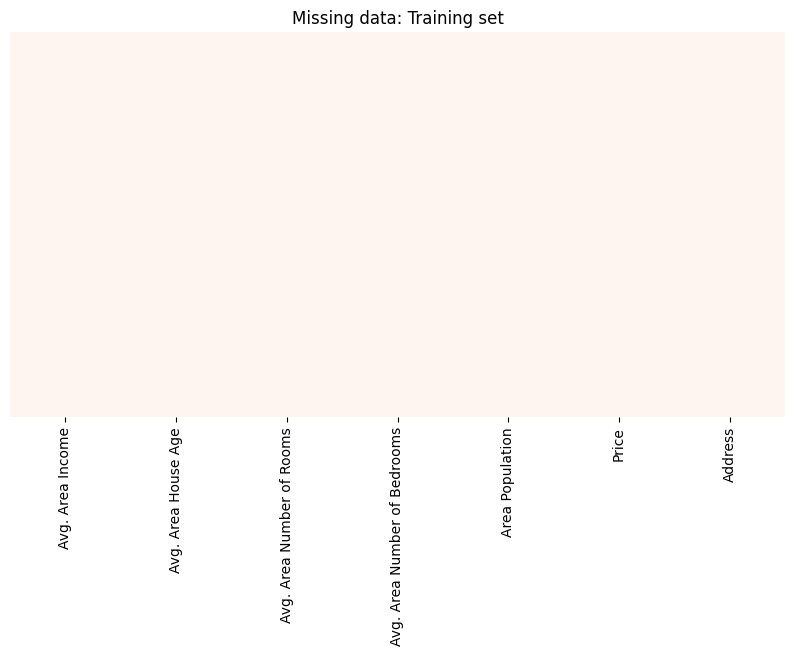

In [7]:
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'Reds')
plt.title('Missing data: Training set')
plt.show()

In [8]:
# to make it easy for now lets remove Address column(Objects)
dataset.drop('Address', axis = 1, inplace =True)

In [9]:
# not important to do it
# remove row with missing data
dataset.dropna(inplace = True)

In [10]:
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


***`Numeric features`***

In [11]:
# numerica summary
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


***Getting model ready***

In [12]:
dataset.shape

(5000, 6)

***Machine Learning***

spliting the target and features varaibles

In [13]:
# features variables
x = dataset.drop('Price', axis = 1)
# targets variables
y = dataset['Price']

In [14]:
x.shape

(5000, 5)

In [15]:
y.shape

(5000,)

***Now split the data into train data and test data***

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train = train_test_split(x, y, test_size= 0.20, random_state= 101)

In [17]:
x_train
#x_train.shape

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [18]:
y_train
#y_train.shape

3413    1.305210e+06
1610    1.400961e+06
3459    1.048640e+06
4293    1.231157e+06
1039    1.391233e+06
            ...     
4171    7.296417e+05
599     1.599479e+06
1361    1.102641e+06
1547    8.650995e+05
4959    2.108376e+06
Name: Price, Length: 4000, dtype: float64

# ***Linear Regression***

***Model Training***

In [19]:
# Fit
# import model
from sklearn.linear_model import LinearRegression

# create instance
model = LinearRegression()

# fit data
model.fit(x_train, y_train)

LinearRegression()

***Model Testing***

class testing

In [20]:
# predict
y_predict = model.predict(x_test)
print(y_predict.shape)
print(y_predict)

(1000,)
[1257919.729097    822112.41884197 1740669.05865495  972452.12917494
  993422.26329315  644126.07414456 1073911.79101682  856584.00194133
 1445318.25518365 1204342.19071175 1455792.46212863 1298556.65696433
 1735924.33836095 1336925.7757779  1387637.43231922 1222403.77772069
  613786.28691982  963933.54416267 1221197.33050139 1198071.57563599
  505861.89531673 1769106.54723353 1853881.16842511 1200369.50507868
 1065129.1285072  1812033.73067313 1768686.47091262 1439920.83814323
 1387251.99649376 1541178.39224181  726418.80504278 1754497.60908688
 1462185.72653198 1025600.16081145 1284926.8685155   917454.59590853
 1187046.94956865  999330.91117488 1329536.63409595  782191.60441437
 1393272.03053841  578216.88394851  822643.37151048 1895533.11413226
 1672019.8489204   966926.45434583 1129674.55638146  792797.75914663
 1161057.18412143 1472396.71417164 1457656.70412313 1162939.334229
 1099453.68110992 1358107.44619413  841103.70380593  986322.30573616
 1123323.53002134 1253538.63

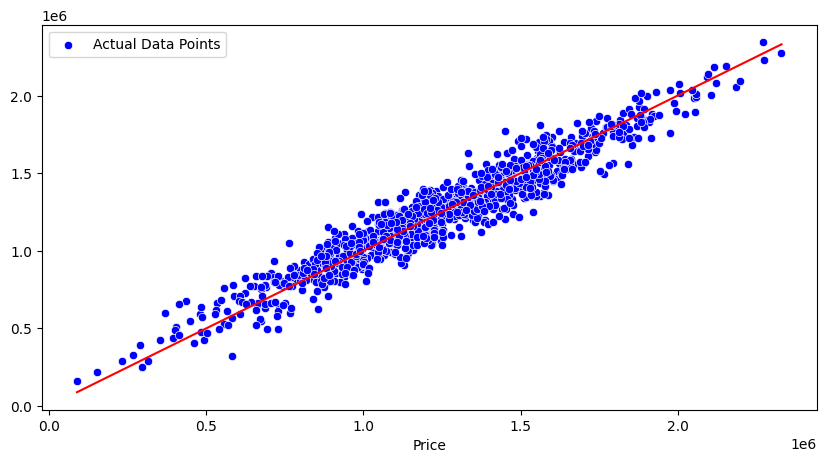

In [21]:
sns.scatterplot(x = y_test, y= y_predict, color = 'blue', label = 'Actual Data Points')
plt.plot([min(y_test,), max(y_test)], [min(y_test), max(y_test)], color = 'red', label = 'Ideal Line')
plt.show()

In [22]:
# combine the actual and predicted value side by side
results = np.column_stack((y_test, y_predict))

# printing the results
print('Actual value  |   Predicted value')
print('---------------------------------')
for actual, predicted in results:
  print(f"{actual:14.2f} | {predicted:12.2f}")

Actual value  |   Predicted value
---------------------------------
    1251688.62 |   1257919.73
     873048.32 |    822112.42
    1696977.66 |   1740669.06
    1063964.29 |    972452.13
     948788.28 |    993422.26
     730043.65 |    644126.07
    1166925.15 |   1073911.79
     705444.12 |    856584.00
    1499988.88 |   1445318.26
    1288199.15 |   1204342.19
    1441736.76 |   1455792.46
    1279681.15 |   1298556.66
    1754969.16 |   1735924.34
    1511653.45 |   1336925.78
    1441956.20 |   1387637.43
    1119992.62 |   1222403.78
     727866.53 |    613786.29
    1138885.10 |    963933.54
    1074263.32 |   1221197.33
    1386473.37 |   1198071.58
     404643.60 |    505861.90
    1449829.49 |   1769106.55
    1775874.76 |   1853881.17
    1202050.58 |   1200369.51
    1105737.46 |   1065129.13
    1835564.69 |   1812033.73
    1795428.77 |   1768686.47
    1424283.37 |   1439920.84
    1365945.08 |   1387252.00
    1492011.50 |   1541178.39
     624432.97 |    726418.81
  

***Residual Analysis***

In [23]:
residual = actual - y_predict.reshape(-1)
print(residual)

[-6.97228472e+04  3.66084463e+05 -5.52472177e+05  2.15744753e+05
  1.94774619e+05  5.44070808e+05  1.14285091e+05  3.31612880e+05
 -2.57121373e+05 -1.61453088e+04 -2.67595580e+05 -1.10359775e+05
 -5.47727456e+05 -1.48728894e+05 -1.99440550e+05 -3.42068958e+04
  5.74410595e+05  2.24263338e+05 -3.30004486e+04 -9.87469372e+03
  6.82334987e+05 -5.80909665e+05 -6.65684287e+05 -1.21726232e+04
  1.23067753e+05 -6.23836849e+05 -5.80489589e+05 -2.51723956e+05
 -1.99055115e+05 -3.52981510e+05  4.61778077e+05 -5.66300727e+05
 -2.73988845e+05  1.62596721e+05 -9.67299866e+04  2.70742286e+05
  1.14993234e+03  1.88865971e+05 -1.41339752e+05  4.06005277e+05
 -2.05075149e+05  6.09979998e+05  3.65553510e+05 -7.07336232e+05
 -4.83822967e+05  2.21270428e+05  5.85223255e+04  3.95399123e+05
  2.71396978e+04 -2.84199832e+05 -2.69459822e+05  2.52575477e+04
  8.87432008e+04 -1.69910564e+05  3.47093178e+05  2.01874576e+05
  6.48733519e+04 -6.53417504e+04 -2.40082781e+05  6.89093673e+05
 -2.74620202e+05  7.94525

<Axes: ylabel='Density'>

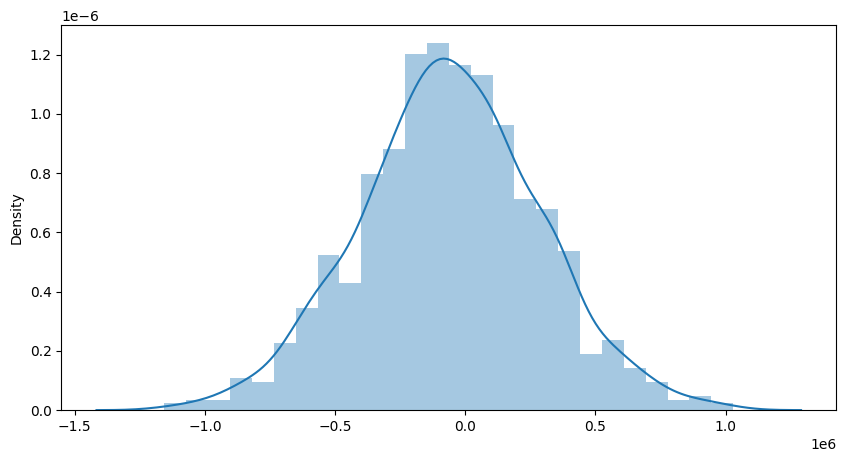

In [24]:
# Distribution plot for Residual (difference beween actual and predicted value)

sns.distplot(residual, kde = True)

***Model Evaluation***

In [25]:
# score it
from sklearn.metrics import mean_squared_error
# result
print('--'*20)

#mean square error (y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

rmse = np.sqrt(mse)

#print evaultion metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

----------------------------------------
Mean Squared Error: 10100187858.864885
Root Mean Squared Error: 100499.69083964829


***Interpretion***